[0.         0.         0.         ... 3.40440083 3.52444694 3.62039202]
time:2017-12-12 23:47:40
time:2017-12-19 20:33:20


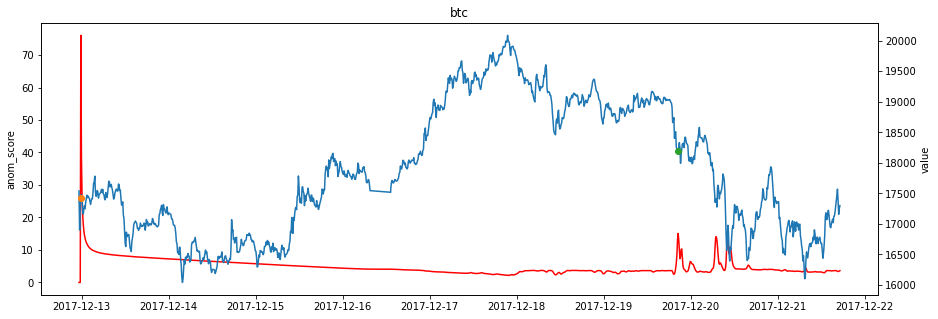

,Unnamed: 0,timestamp,zcl,ubq,off,frgc,grc,poke,drs,nlg,...,xp,ula,ams,c2,enrg,wow,pcn,nxs,ur,score
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-12-12 23:17:00,0,2017-12-12 23:17:00,2.18,1.86,0.023512,10.75,0.072289,0.000171,0.000174,0.097996,...,0.000095,0.023942,0.006896,0.003028,0.131878,0.000123,0.000174,2.46,0.001175,-15.000000
2017-12-12 23:17:04,1,2017-12-12 23:17:04,2.19,1.86,0.023400,10.74,0.071696,0.000171,0.000173,0.097569,...,0.000105,0.023849,0.006869,0.003017,0.131369,0.000125,0.000173,2.45,0.001177,-15.000000
2017-12-12 23:17:30,2,2017-12-12 23:17:30,2.19,1.86,0.023400,10.74,0.071696,0.000171,0.000173,0.097569,...,0.000105,0.023849,0.006869,0.003017,0.131369,0.000125,0.000173,2.45,0.001177,-15.000000
2017-12-12 23:27:33,3,2017-12-12 23:27:33,2.19,1.84,0.022893,10.74,0.071659,0.000171,0.000173,0.097326,...,0.000103,0.023837,0.006866,0.003015,0.131475,0.000121,0.000173,2.43,0.001018,-15.000000
2017-12-12 23:37:37,4,2017-12-12 23:37:37,2.18,1.83,0.023509,10.73,0.071551,0.000171,0.000172,0.095713,...,0.000110,0.023707,0.006829,0.002744,0.130760,0.000121,0.000172,2.41,0.001025,-15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21 16:30:53,98,2017-12-21 16:30:53,4.95,4.01,0.033543,10.73,0.109207,0.000348,0.000174,0.185354,...,0.000256,0.028503,0.004345,0.004345,0.153811,0.000169,0.000174,4.11,0.001154,-11.562432
2017-12-21 16:41:00,99,2017-12-21 16:41:00,4.93,3.99,0.033372,10.73,0.108491,0.000346,0.000173,0.188274,...,0.000284,0.028358,0.004323,0.004323,0.153720,0.000168,0.000173,4.07,0.001146,-11.634582
2017-12-21 16:51:05,100,2017-12-21 16:51:05,4.89,4.01,0.032960,10.71,0.108009,0.000342,0.000171,0.183746,...,0.000274,0.028008,0.004269,0.004269,0.151993,0.000166,0.000171,4.09,0.001132,-11.595599


In [1]:
%matplotlib inline
import changefinder
import pandas as pd 
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import os


def str2datetime(tstr):
    if tstr.__class__.__name__ == "datetime":
        return tstr
    ts = tstr.split(".")[0]
    return dt.strptime(ts, "%Y-%m-%d %H:%M:%S")

def calc_cf(name, df, cf, threshold=30):
    values = df[name].values 
    scores = np.array([cf.update(value) for value in values])
    print(scores)
    # 描画
    fig, ax1 = plt.subplots(figsize=(15,5))
    ax1.set_title(name)
    ax1.plot(df.index, scores,color="red")
    ax1.set_ylabel("anom_score")
    ax2 = ax1.twinx()  # 2つのプロットを関連付ける
    ax2.plot(df.index, df[name].values)
    ax2.set_ylabel("value")
    # しきい値越えリスト
    df["score"] = scores - threshold
    for i in range(1,len(df)):
        if df.iloc[i-1]["score"] < 0 and df.iloc[i]["score"] >= 0:
            print("time:{}".format(df.iloc[i]["timestamp"]))
            ax2.plot(df.index[i],df.iloc[i][name],"o")
    plt.show()
    return df

cf = changefinder.ChangeFinder(r=0.01, order=1, smooth=3)
df = pd.read_csv("coindata.csv").dropna()
df.index = df.timestamp.apply(str2datetime)
calc_cf(name="btc",df=df, cf=cf, threshold=15)